# Histogramas 3D

Importamos la clase Axes3D que nos permitirá visualizar histogramas 3D.

Axes3D requiere tres argumentos: la imagen de entrada, el tamaño de la barra de color más grande y, finalmente, el número de barras por canal.

### Importar librerias

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Función para mostrar imágenes

In [2]:
def mostrar_imagen(titulo, imagen):
  imagen = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  plt.imshow(imagen)
  plt.title(titulo)
  plt.grid(False)
  plt.show()

Diccionario para establecer los argumentos

In [7]:
args = {"imagen": "beach.png",
       "tamaño":1000,
       "bins":4}

### Histograma 3D

Leer la imagen y mostrarla

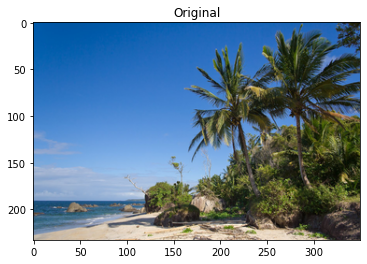

In [8]:
imagen = cv2.imread(args["imagen"])
mostrar_imagen("Original",imagen)

Definir las otras variables

In [9]:
tam = float(args["tamaño"])
bins = int(args["bins"])

Calcula el histograma de color para la imagen de entrada

In [1]:
# Calcula el histograma de color para la imagen de entrada
hist = cv2.calcHist([imagen], [0, 1, 2],
                    None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])

# mostrar la forma del histograma
print("Forma del histograma 3D: %s, con %d valores" %
      (hist.shape, hist.flatten().shape[0]))

# inicializar la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# encuentra el valor más grande en el histograma y calcula el ratio
# del bin de tamaño más grande
ratio = tam / np.max(hist)

# bucle sobre los planos del histograma
for (x, plane) in enumerate(hist):
    for (y, row) in enumerate(plane):
        for (z, col) in enumerate(row):
            # asegura que existe un valor en el bin
            if hist[x][y][z] > 0.0:
                # plot the bin
                siz = ratio * hist[x][y][z]
                rgb = (z / (bins - 1), y / (bins - 1), x / (bins - 1))
                ax.scatter(x, y, z, s = siz, facecolors = rgb)

# mostrar la figura
plt.show()

NameError: name 'cv2' is not defined